# ARIMA

In [5]:
import quandl
import warnings
import itertools
import numpy as np
import pandas as pd


import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style('whitegrid')
sns.set_context('talk')


from statsmodels.tsa.seasonal import seasonal_decompose


from arima_utils import ad_fuller_test, plot_rolling_stats
from arima_utils import plot_acf_pacf, arima_gridsearch_cv

In [6]:
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (15, 5),
          'axes.labelsize': 'x-large',
          'axes.titlesize':'x-large',
          'xtick.labelsize':'x-large',
          'ytick.labelsize':'x-large'}

%matplotlib inline
plt.rcParams.update(params)

# specify to ignore warning messages
warnings.filterwarnings("ignore") 

## Getting the Data

In [7]:
df = quandl.get("BUNDESBANK/BBK01_WT5511", end_date="2018-08-12")
print(df.shape)

new_df = df.reindex(pd.date_range(df.index.min(), 
                                  df.index.max(), 
                                  freq='D')).fillna(method='ffill')
print(new_df.shape)
#close_series = new_df.Close

(12152, 1)
(17550, 1)


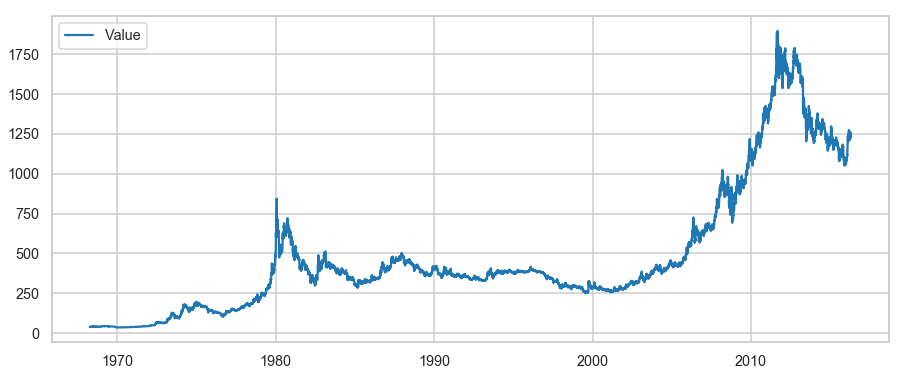

In [8]:
new_df.plot(figsize=(15, 6))
plt.show()

## Decompose

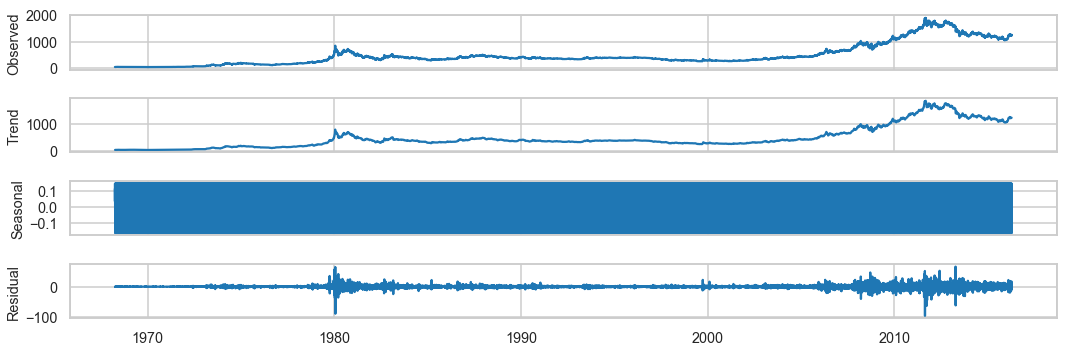

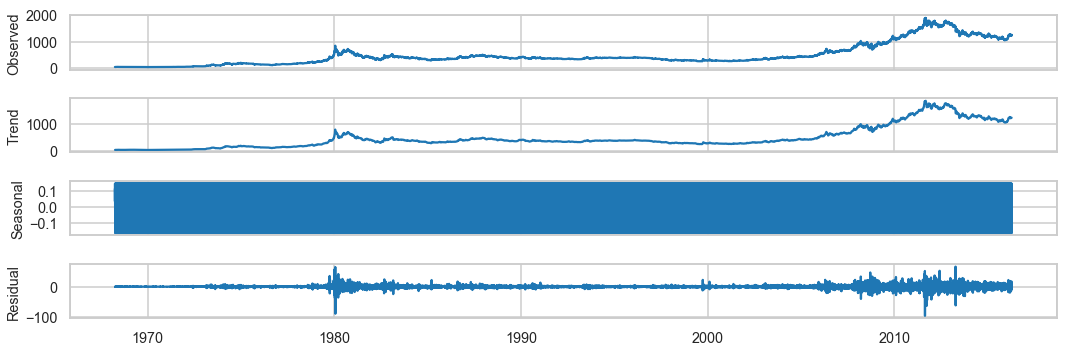

In [9]:
decompose = seasonal_decompose(new_df.Value.interpolate())
decompose.plot()

## Dickey Fuller Test

### Original Series

Test Statistic                    -0.364334
p-value                            0.915886
#Lags Used                        43.000000
Number of Observations Used    17506.000000
Critical Value (5%)               -2.861705
Critical Value (1%)               -3.430724
Critical Value (10%)              -2.566858
dtype: float64


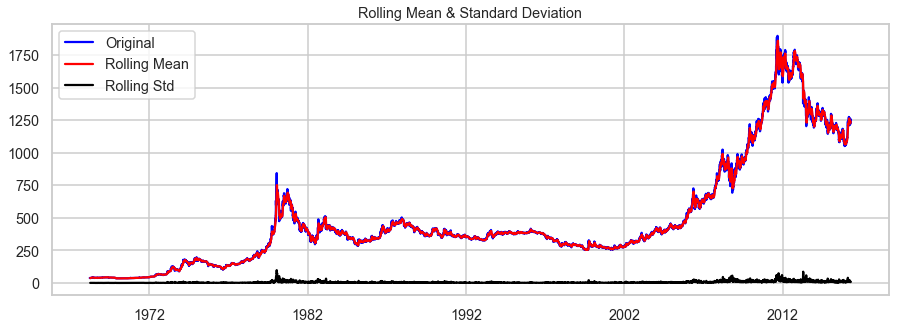

In [10]:
# Original Series
ad_fuller_test(new_df.Value)
plot_rolling_stats(new_df.Value)

### Log Series

Test Statistic                    -1.849748
p-value                            0.356057
#Lags Used                        29.000000
Number of Observations Used    17520.000000
Critical Value (5%)               -2.861705
Critical Value (1%)               -3.430723
Critical Value (10%)              -2.566858
dtype: float64


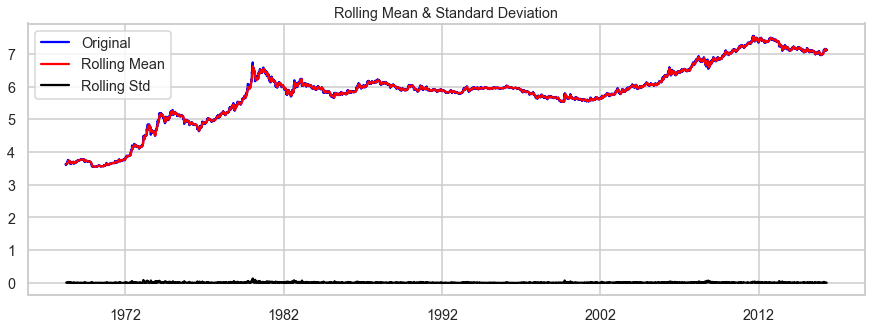

In [11]:
log_series = np.log(new_df.Value)

ad_fuller_test(log_series)
plot_rolling_stats(log_series)

### Log Difference

In [12]:
# Using log series with a shift to make it stationary
log_series_shift = log_series - log_series.shift()
log_series_shift = log_series_shift[~np.isnan(log_series_shift)]

Test Statistic                   -23.917175
p-value                            0.000000
#Lags Used                        28.000000
Number of Observations Used    17520.000000
Critical Value (5%)               -2.861705
Critical Value (1%)               -3.430723
Critical Value (10%)              -2.566858
dtype: float64


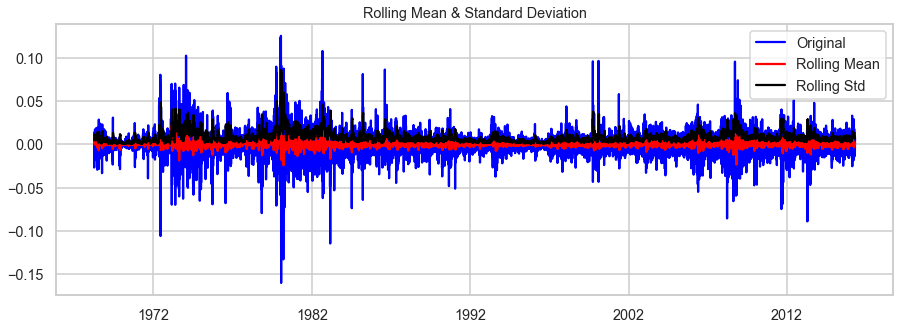

In [13]:
ad_fuller_test(log_series_shift)
plot_rolling_stats(log_series_shift)

## ACF/ PACF

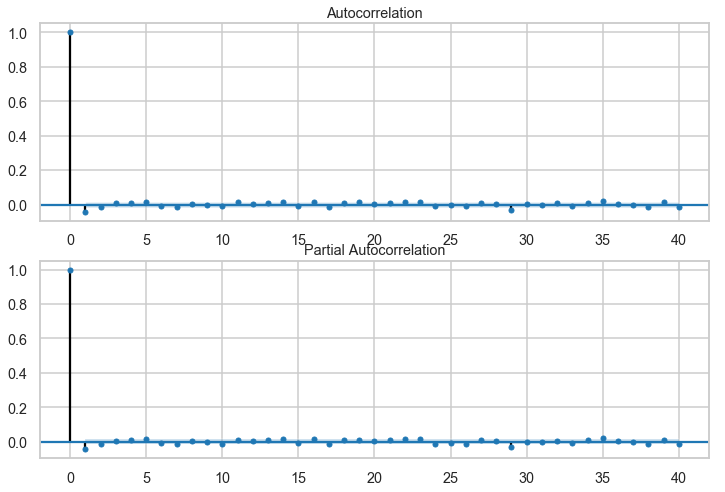

In [14]:
plot_acf_pacf(log_series_shift)

Log Differenced series seems stationary, same is visible through ACF and PACF plots

## ARIMA

In [15]:
new_df['log_series'] = log_series
new_df['log_series_shift'] = log_series_shift

### Training-Testing Split

********************
Iteration 1 of 5
TRAIN: [   0    1    2 ... 2922 2923 2924] TEST: [2925 2926 2927 ... 5847 5848 5849]
Train shape:(2925,), Test shape:(2925,)
ARIMA(0, 0, 0)- AIC:5358.675881541096
ARIMA(0, 0, 1)- AIC:1370.6441737160212
ARIMA(0, 1, 0)- AIC:-17795.53995335306
ARIMA(0, 1, 1)- AIC:-17793.564973634646
ARIMA(1, 0, 0)- AIC:-17788.09838866874
ARIMA(1, 0, 1)- AIC:-17786.10419500833
ARIMA(1, 1, 0)- AIC:-17793.56214397539
ARIMA(1, 1, 1)- AIC:-17796.0060632679
Best Model params:(1, 1, 1) AIC:-17796.0060632679
                             ARIMA Model Results                              
Dep. Variable:           D.log_series   No. Observations:                 2924
Model:                 ARIMA(1, 1, 1)   Log Likelihood                8902.003
Method:                       css-mle   S.D. of innovations              0.012
Date:                Mon, 13 Aug 2018   AIC                         -17796.006
Time:                        13:44:10   BIC                         -17772.083
Sa

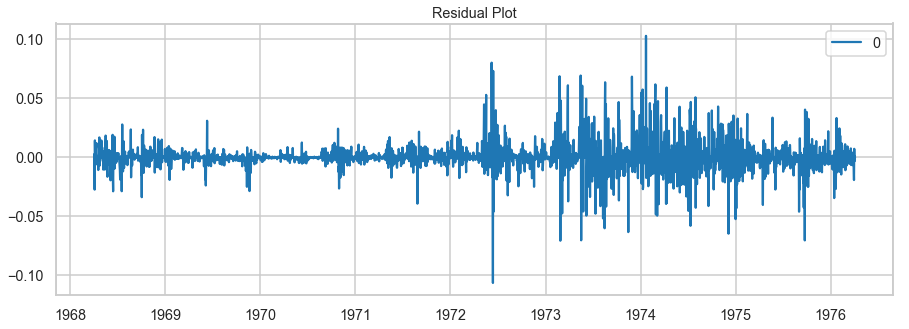

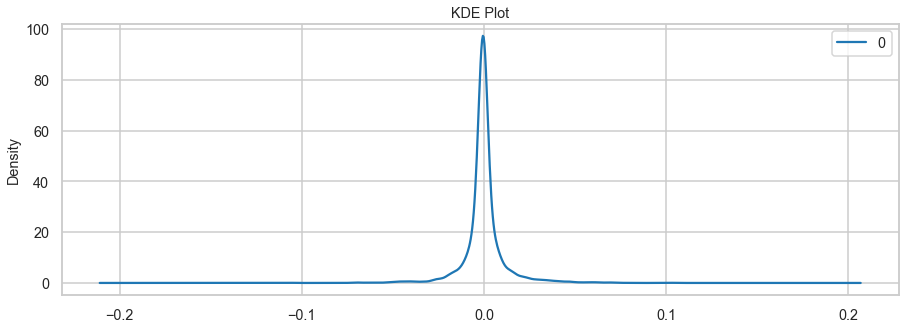

                  0
count  2.924000e+03
mean   1.849657e-07
std    1.152510e-02
min   -1.065016e-01
25%   -1.970509e-03
50%   -4.105300e-04
75%    1.345752e-03
max    1.024452e-01


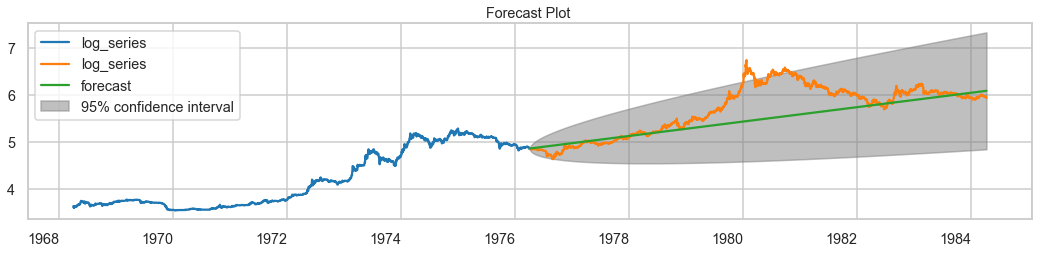

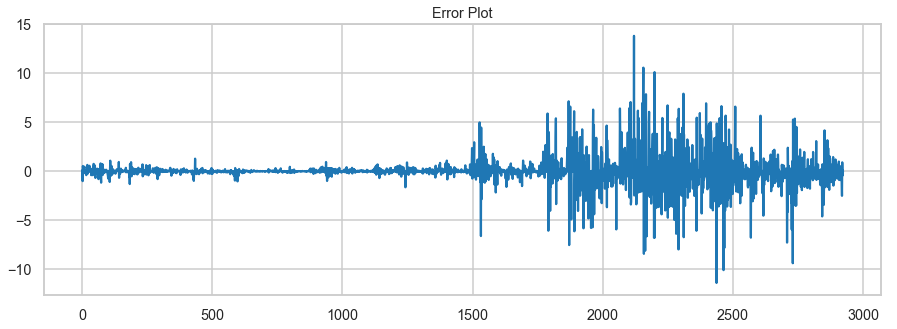

********************
Iteration 2 of 5
TRAIN: [   0    1    2 ... 5847 5848 5849] TEST: [5850 5851 5852 ... 8772 8773 8774]
Train shape:(5850,), Test shape:(2925,)
ARIMA(0, 0, 0)- AIC:15792.660349788817
ARIMA(0, 0, 1)- AIC:7814.097096459913
ARIMA(0, 1, 0)- AIC:-33512.28307448927
ARIMA(0, 1, 1)- AIC:-33516.96483490143
ARIMA(1, 0, 0)- AIC:-33502.698980690664
ARIMA(1, 0, 1)- AIC:-33507.00768410176
ARIMA(1, 1, 0)- AIC:-33516.56690977644
ARIMA(1, 1, 1)- AIC:-33517.28713825842
Best Model params:(1, 1, 1) AIC:-33517.28713825842
                             ARIMA Model Results                              
Dep. Variable:           D.log_series   No. Observations:                 5849
Model:                 ARIMA(1, 1, 1)   Log Likelihood               16762.644
Method:                       css-mle   S.D. of innovations              0.014
Date:                Mon, 13 Aug 2018   AIC                         -33517.287
Time:                        13:44:15   BIC                         -33490.591


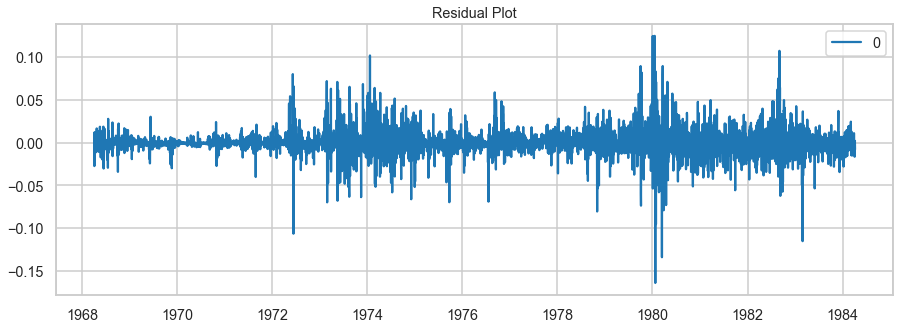

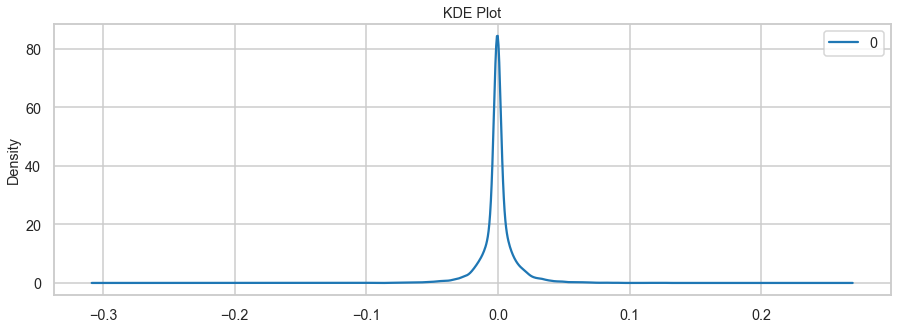

                  0
count  5.849000e+03
mean  -1.241006e-07
std    1.377704e-02
min   -1.640483e-01
25%   -2.716842e-03
50%   -4.121953e-04
75%    2.374834e-03
max    1.249848e-01


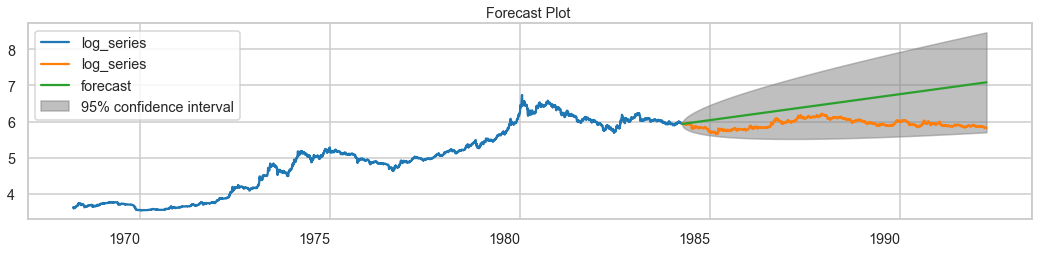

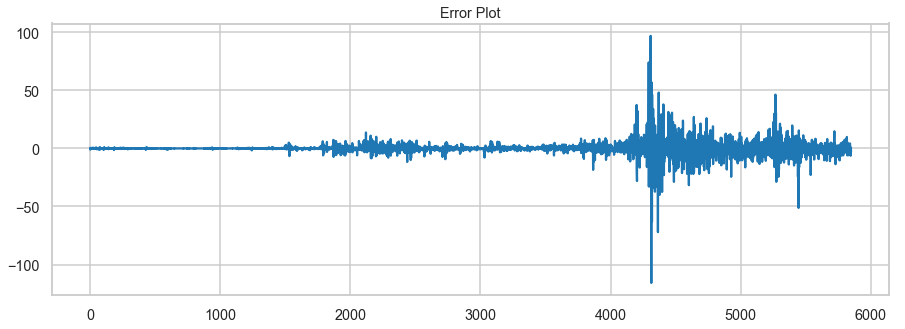

********************
Iteration 3 of 5
TRAIN: [   0    1    2 ... 8772 8773 8774] TEST: [ 8775  8776  8777 ... 11697 11698 11699]
Train shape:(8775,), Test shape:(2925,)
ARIMA(0, 0, 0)- AIC:22924.70092833443
ARIMA(0, 0, 1)- AIC:10939.921256251508
ARIMA(0, 1, 0)- AIC:-52348.46895881139
ARIMA(0, 1, 1)- AIC:-52365.88642216349
ARIMA(1, 0, 0)- AIC:-52340.1357071245
ARIMA(1, 0, 1)- AIC:-52357.136942726065
ARIMA(1, 1, 0)- AIC:-52364.9954035126
ARIMA(1, 1, 1)- AIC:-52366.21248650897
Best Model params:(1, 1, 1) AIC:-52366.21248650897
                             ARIMA Model Results                              
Dep. Variable:           D.log_series   No. Observations:                 8774
Model:                 ARIMA(1, 1, 1)   Log Likelihood               26187.106
Method:                       css-mle   S.D. of innovations              0.012
Date:                Mon, 13 Aug 2018   AIC                         -52366.212
Time:                        13:44:20   BIC                         -52337.

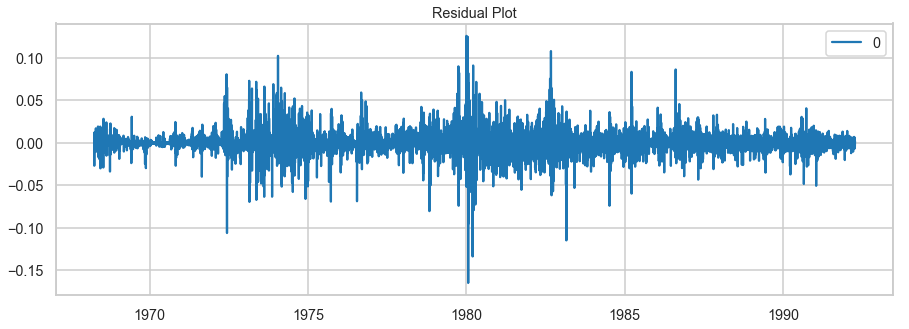

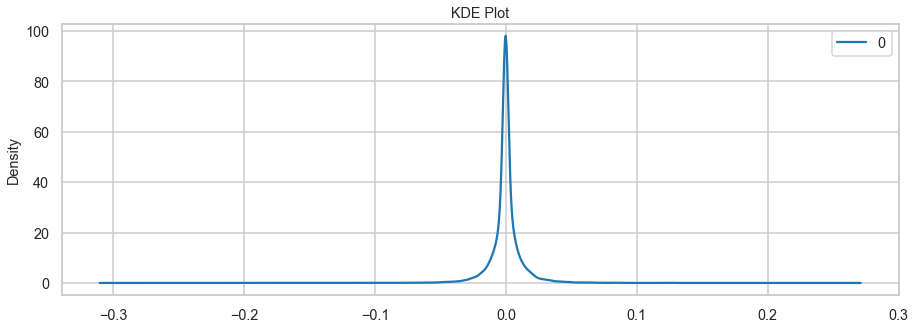

                  0
count  8.774000e+03
mean  -8.682988e-08
std    1.223435e-02
min   -1.650597e-01
25%   -2.567140e-03
50%   -2.630354e-04
75%    2.402574e-03
max    1.256746e-01


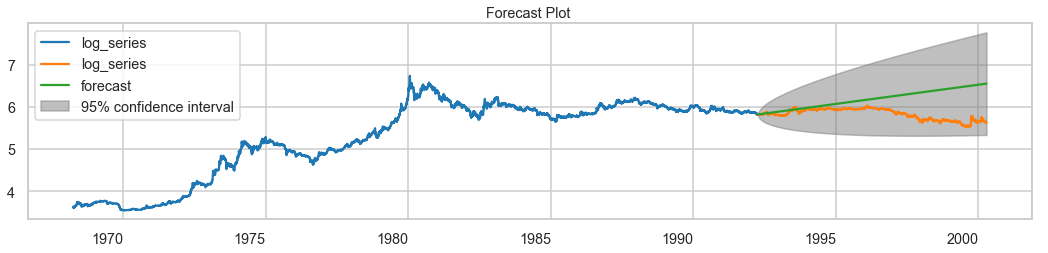

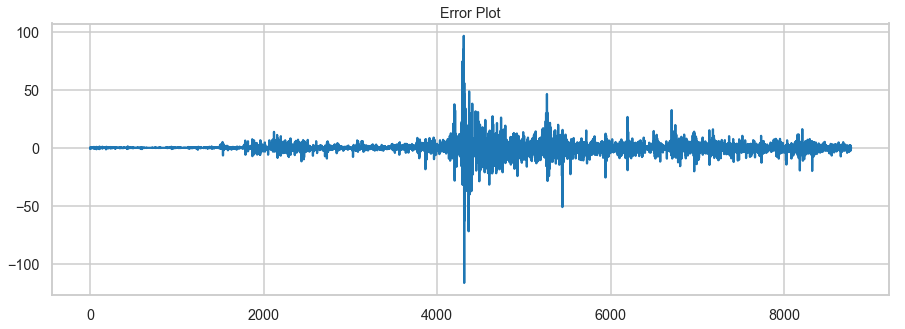

********************
Iteration 4 of 5
TRAIN: [    0     1     2 ... 11697 11698 11699] TEST: [11700 11701 11702 ... 14622 14623 14624]
Train shape:(11700,), Test shape:(2925,)
ARIMA(0, 0, 0)- AIC:28323.59324349887
ARIMA(0, 0, 1)- AIC:12343.352798126118
ARIMA(0, 1, 0)- AIC:-72092.36827299211
ARIMA(0, 1, 1)- AIC:-72119.8213792119
ARIMA(1, 0, 0)- AIC:-72085.08760853324
ARIMA(1, 0, 1)- AIC:-72112.18893041922
ARIMA(1, 1, 0)- AIC:-72118.75588542139
ARIMA(1, 1, 1)- AIC:-72119.8649602102
Best Model params:(1, 1, 1) AIC:-72119.8649602102
                             ARIMA Model Results                              
Dep. Variable:           D.log_series   No. Observations:                11699
Model:                 ARIMA(1, 1, 1)   Log Likelihood               36063.932
Method:                       css-mle   S.D. of innovations              0.011
Date:                Mon, 13 Aug 2018   AIC                         -72119.865
Time:                        13:44:28   BIC                         -7

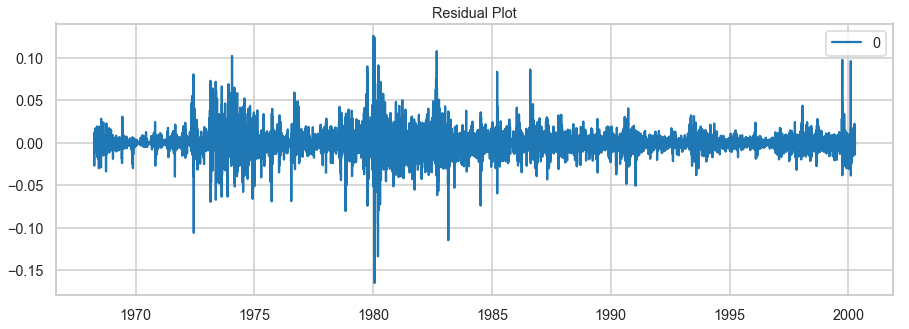

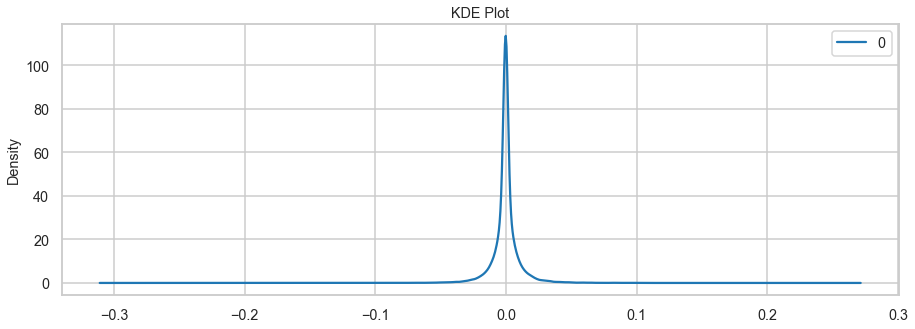

                  0
count  1.169900e+04
mean  -6.610817e-08
std    1.109183e-02
min   -1.652707e-01
25%   -2.322445e-03
50%   -1.811554e-04
75%    2.032707e-03
max    1.259057e-01


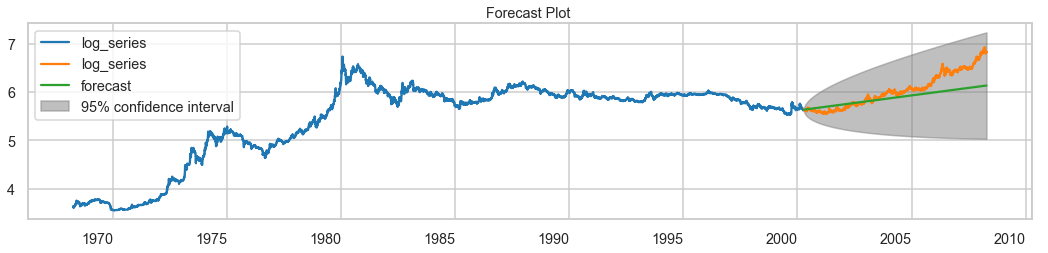

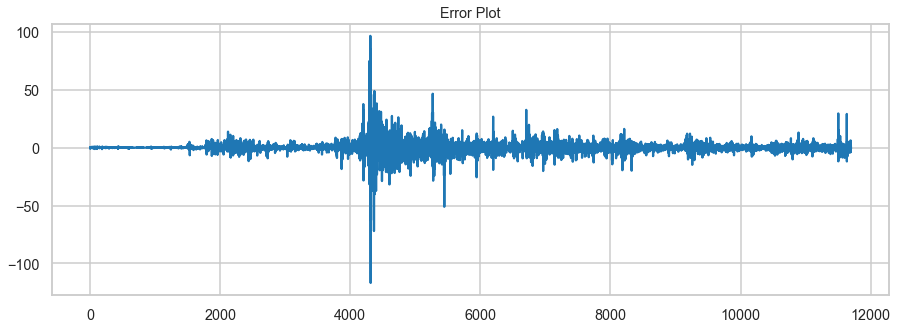

********************
Iteration 5 of 5
TRAIN: [    0     1     2 ... 14622 14623 14624] TEST: [14625 14626 14627 ... 17547 17548 17549]
Train shape:(14625,), Test shape:(2925,)
ARIMA(0, 0, 0)- AIC:34336.88986620506
ARIMA(0, 0, 1)- AIC:14355.652400376028
ARIMA(0, 1, 0)- AIC:-91312.7549609122
ARIMA(0, 1, 1)- AIC:-91348.77150649173
ARIMA(1, 0, 0)- AIC:-91301.1318476811
ARIMA(1, 0, 1)- AIC:-91336.41118376065
ARIMA(1, 1, 0)- AIC:-91347.65810577202
ARIMA(1, 1, 1)- AIC:-91348.29945381224
Best Model params:(0, 1, 1) AIC:-91348.77150649173
                             ARIMA Model Results                              
Dep. Variable:           D.log_series   No. Observations:                14624
Model:                 ARIMA(0, 1, 1)   Log Likelihood               45677.386
Method:                       css-mle   S.D. of innovations              0.011
Date:                Mon, 13 Aug 2018   AIC                         -91348.772
Time:                        13:44:39   BIC                         -

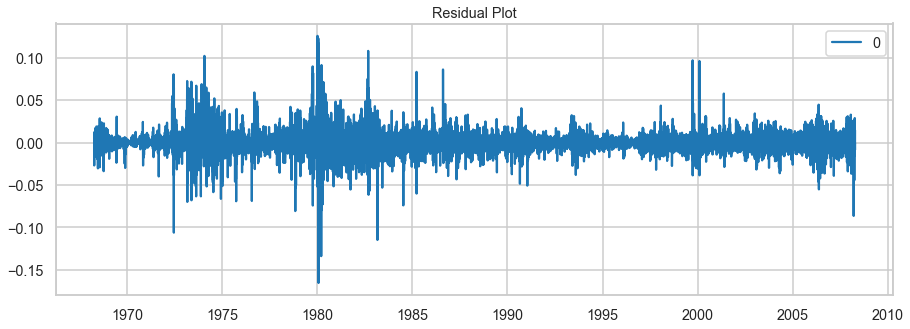

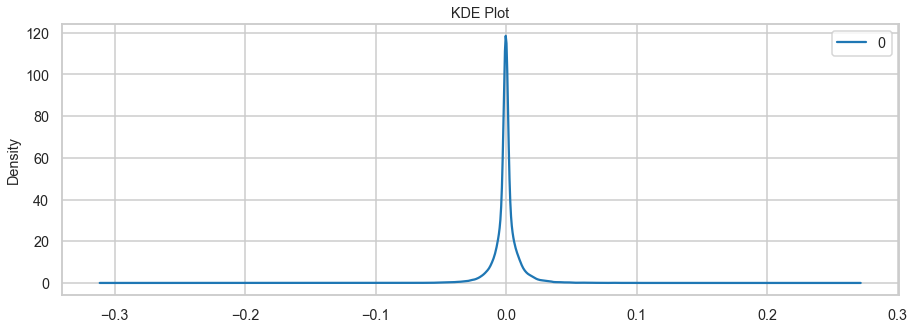

                  0
count  1.462400e+04
mean  -3.472696e-08
std    1.064827e-02
min   -1.656143e-01
25%   -2.387169e-03
50%   -2.301705e-04
75%    2.207817e-03
max    1.258538e-01


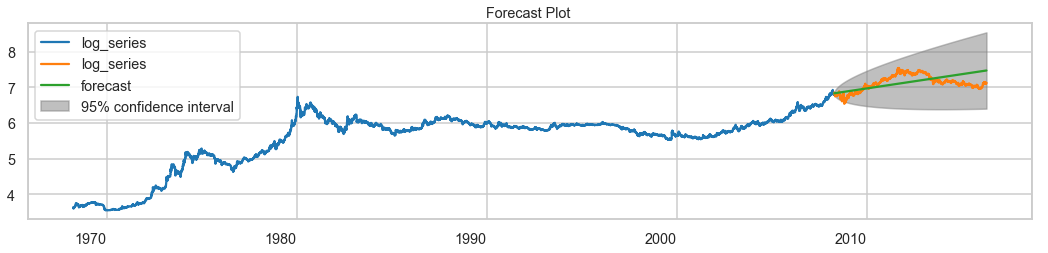

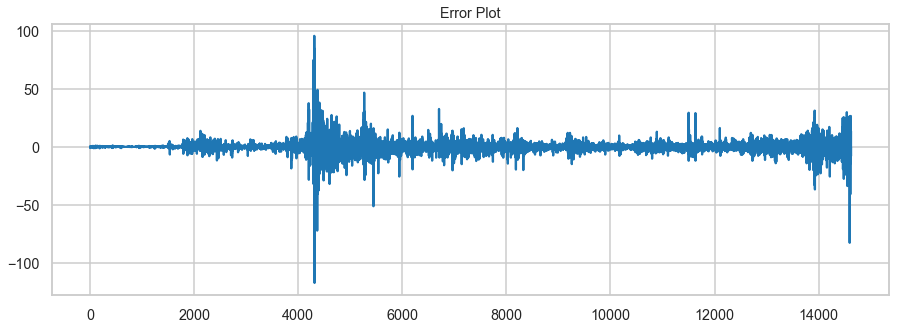

In [16]:
results_dict = arima_gridsearch_cv(new_df.log_series,cv_splits=5)